In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [18]:
base_command= [120, 180, -120] #initial motor command

#cas bas vers coté : bc
try_1_bc = [[121 ,181 ,-120], [119, 182, -120], [120 ,182 ,-120], [121, 180, -120], [121, 180, -120], [122 ,181 ,-119], [121 ,181 ,-122], [120 ,180 ,-119], [121 ,181 ,-122], [121,  182,  -123], [122, 182, -122], [120, 182, -122], [121, 181, -122], [122, 182, -121], [120, 182, -121], [121, 182, -122], [121, 180, -121]]
_f_1_bc = [0.49, 0.77, 0.837, 0.349, 0.349, 1.02, 0.27, 0.6376, 0.27, 0.7, 1.03, 0.57, 0.27, 1.02, 0.5, 0.92, 0.034]

try_2_bc = [[120, 181, -121], [120, 181, -121], [119, 181, -121], [120, 181, -120], [120, 181, -121], [121, 180, -122], [121, 181, -120], [119, 181, -120], [121, 180, -122], [120, 180, -122], [122, 180, -121], [120, 180, -121], [121, 180, -121]]
_f_2_bc = [0.68, 0.46, 0.8518, 0.57, 0.46, 0.304, 0.8494, 0.694, 0.304, 0.325, 1.039, 0.3852, 0.034]

try_3_bc = [[121, 180, -120], [119, 182, -120], [120, 182, -120], [121, 180, -120], [121, 180, -120] ,[122, 181, -119], [122, 180, -119], [120, 180, -119], [121, 180, -120], [122, 181, -119], [122, 180, -119], [120, 180, -119], [121, 180, -120], [121, 180, -119], [122, 180, -121,], [120, 180, -121], [121, 180, -121]]
_f_3_bc = [0.49, 0.77, 0.837, 0.349 , 0.349, 1.01, 1.00, 0.6376, 0.349, 0.858, 0.972, 0.4232, 0.03]

try_4_bc = [[121, 181, -122], [122, 182, -123], [120, 182, -123], [121, 182, -123], [121, 181, -123], [122, 180, -123], [122, 181, -122], [122, 181, -124], [121, 181, -123], [121 , 181, -123], [122, 182, -123], [120, 182, -123], [121, 181, -122], [122, 181, -121], [122, 181, -123], [120, 181, -123]]

_f_4_bc  = [0.33, 0.9704, 0.573, 0.594, 0.2918, 0.6582, 0.9822, 0.8958, 0.3156, 0.2918,0.9654,0.5834, 0.3156, 0.4284, 0.9122, 0.5682]


#cas cote vers haut ch
try_1_ch = [[120 ,181 ,-122], [118, 181, -120], [119, 181, -120], [120, 181, -122], [120, 181, -122], [120, 180, -122], [119, 181, -122], [121, 181, -121], [120, 180, -122], [121, 181,-122], [119, 180, -122], [121, 180, -121], [120, 180 ,-121]]
_f_1_ch = [0.402, 0.7, 0.5, 0.38, 0.38, 0.09, 0.48, 0.98, 0.09, 0.93, 0.49, 0.575, 0.034]

try_3_ch = [[119, 181, -121], [120, 181, -121], [120, 181, -121], [118, 181, -121], [120, 181, -120], [120, 181, -122], [118, 181, -120], [119, 181, -120], [120, 181, -122], [120, 181, -122], [119, 180, -122], [119, 181, -122], [121, 181, -121], [120, 181, -122], [121, 181, -123], [119, 181, -123], [120, 181, -123], [120, 180, -121]]
_f_3_ch = [ 0.487, 0.48, 0.40,0.74, 0.54, 0.44, 0.73, 0.555, 0.385, 0.38, 0.581, 0.5324, 0.9788, 0.3856, 0.828, 0.509, 0.4006, 0.034]



try_4_ch = [[120, 180, -122], [121, 180, -122], [119, 180, -122], [120, 180, -122], [121, 179, -121], [121, 179, -121], [121, 180, -121], [119, 180, -121], [120, 180, -121]]
_f_4_ch = [0.4762, 0.872, 0.489, 0.201, 0.201, 0.1248, 0.9124, 0.401, 0.03]

#cas cote vers cote : cc
try_1_cc =[[120, 180, -120], [119,  181,  -121], [120, 181, -121]]
_f_1_cc = [0.9756, 0.1118, 0.034]

try_2_cc = [[120, 180, -120], [119, 181, -121], [120, 181, -121]]
_f_2_cc = [0.982, 0.2242, 0.034]

try_3_cc = [[120, 180, -120], [119, 181, -121], [120, 181, -121]]
_f_3_cc = [0.9874, 0.1092, 0.034]

try_4_cc = [[120, 180, -120], [119, 181, -121], [120, 181, -121]]
_f_4_cc = [0.9826, 0.1596, 0.034]

In [19]:
#cas bas vers coté : bc
nb_com_bc =[]
index_min_bc = []

nb_com_bc3 = []
index_min_bc3 = []

nb_com_bc2 = []
index_min_bc2 = []

nb_com_bc4 = []
index_min_bc4 = []

base_command= [120, 180, -120]
for i in range(len(_f_1_bc)):
    nb = 0
    if (i % 4 == 0 and i > 0):
        index_min = np.argmin(_f_1_bc[i-4:i])
        index_min_bc.append(index_min +i-4)
    for j in range(0,3):
        nb = abs(base_command[j] - try_1_bc[i][j]) + nb
    nb_com_bc.append(nb)
    
    
base_command= [120, 180, -120]
for i in range(len(_f_3_bc)):
    nb = 0
    if (i % 4 == 0 and i > 0):
        index_min = np.argmin(_f_3_bc[i-4:i])
        index_min_bc3.append(index_min +i-4)
    for j in range(0,3):
        nb = abs(base_command[j] - try_3_bc[i][j]) + nb
    nb_com_bc3.append(nb)


base_command= [120, 180, -120]
for i in range(len(_f_2_bc)):
    nb = 0
    if (i % 4 == 0 and i > 0):
        index_min = np.argmin(_f_2_bc[i-4:i])
        index_min_bc2.append(index_min +i-4)
    for j in range(0,3):
        nb = abs(base_command[j] - try_2_bc[i][j]) + nb
    nb_com_bc2.append(nb)

base_command= [120, 180, -120]
for i in range(len(_f_4_bc)):
    nb = 0
    if (i % 4 == 0 and i > 0):
        index_min = np.argmin(_f_4_bc[i-4:i])
        index_min_bc4.append(index_min +i-4)
    for j in range(0,3):
        nb = abs(base_command[j] - try_4_bc[i][j]) + nb
    nb_com_bc4.append(nb)
    
#cas cote vers haut ch

nb_com_ch =[]
index_min_ch = []

nb_com_ch3 =[]
index_min_ch3 = []

nb_com_ch4 =[]
index_min_ch4 = []

base_command= [120, 180, -120]
for i in range(len(_f_1_ch)):
    nb = 0
    if (i % 4 == 0 and i > 0):
        index_min = np.argmin(_f_1_ch[i-4:i])
        index_min_ch.append(index_min +i-4)
    for j in range(0,3):
        nb = abs(base_command[j] - try_1_ch[i][j]) + nb
    nb_com_ch.append(nb)
    
base_command= [120, 180, -120]
for i in range(len(_f_3_ch)):
    nb = 0
    if (i % 4 == 0 and i > 0):
        index_min = np.argmin(_f_3_ch[i-4:i])
        index_min_ch3.append(index_min +i-4)
    for j in range(0,3):
        nb = abs(base_command[j] - try_3_ch[i][j]) + nb
    nb_com_ch3.append(nb)

base_command= [120, 180, -120]
for i in range(len(_f_4_ch)):
    nb = 0
    if (i % 4 == 0 and i > 0):
        index_min = np.argmin(_f_4_ch[i-4:i])
        index_min_ch4.append(index_min +i-4)
    for j in range(0,3):
        nb = abs(base_command[j] - try_4_ch[i][j]) + nb
    nb_com_ch4.append(nb)
    
#cas cote vers cote : cc

nb_com_cc =[]
index_min_cc = []

base_command= [120, 180, -120]
for i in range(len(_f_1_cc)):
    nb = 0
    if (i % 4 == 0 and i > 0):
        index_min = np.argmin(_f_1_cc[i-4:i])
        index_min_cc.append(index_min +i-4)
    for j in range(0,3):
        nb = abs(base_command[j] - try_1_cc[i][j]) + nb
    nb_com_cc.append(nb)


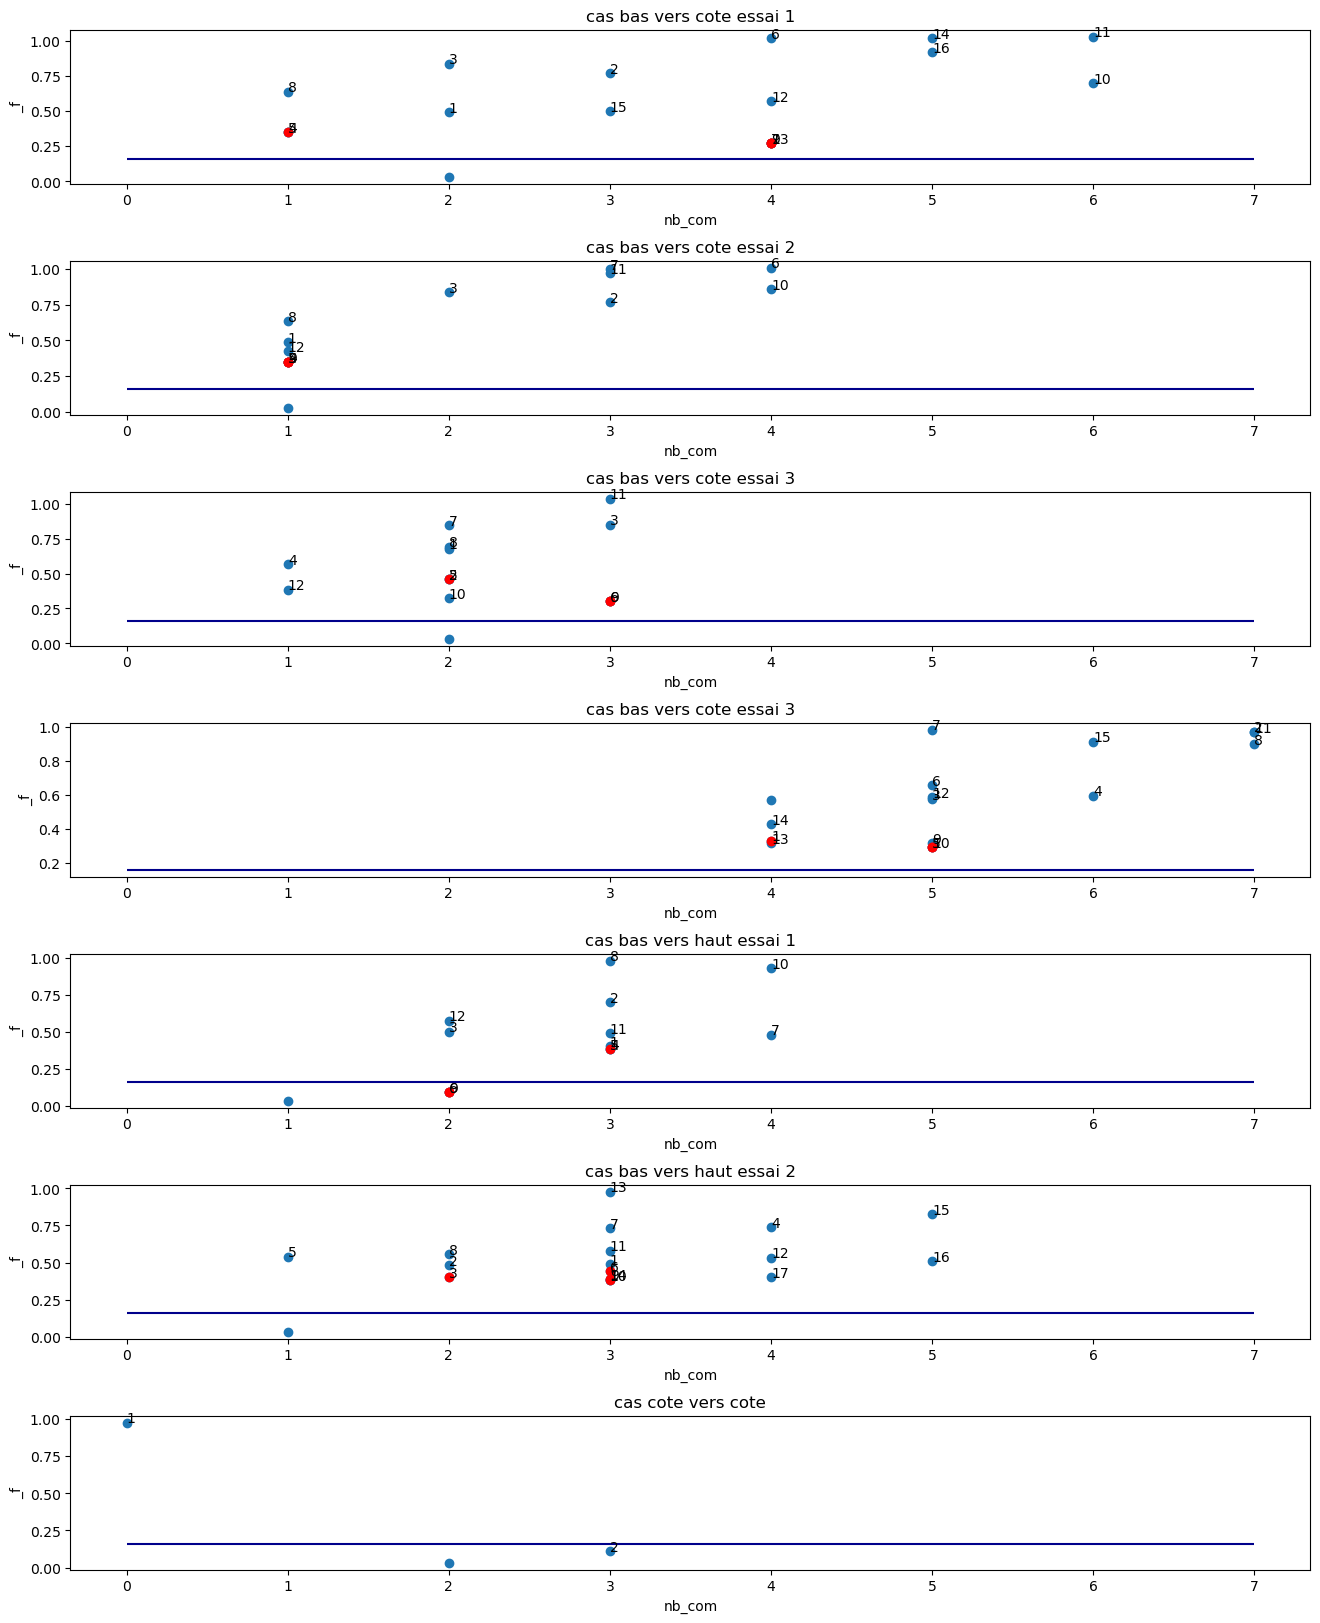

In [23]:
xbc, ybc = nb_com_bc, _f_1_bc
xch, ych = nb_com_ch,  _f_1_ch
xcc, ycc = nb_com_cc,  _f_1_cc
xbc2, ybc2 = nb_com_bc2, _f_2_bc
xbc3, ybc3 = nb_com_bc3, _f_3_bc
xch3, ych3 = nb_com_ch3, _f_3_ch
xch4, ych4 = nb_com_ch4, _f_4_ch
xbc4, ybc4 = nb_com_bc4, _f_4_bc


fig, axs = plt.subplots(7, 1, figsize=(16, 20))
fig.subplots_adjust(hspace=.5)

axs[0].scatter(xbc,ybc)
n_1_bc = np.arange(1, len(_f_1_bc))

for i, txt in enumerate(n_1_bc):
    axs[0].annotate(txt, (xbc[i], ybc[i])) 
    if (i in index_min_bc):
        axs[0].scatter(xbc[i], ybc[i], color = 'r')
        
axs[0].set_title("cas bas vers cote essai 1")   
axs[0].set_xlabel('nb_com')
axs[0].set_ylabel('_f')
axs[0].hlines(y=0.16, xmin = 0, xmax = 7, color='darkblue', alpha=1)

axs[1].scatter(xbc3,ybc3)
n_3_bc = np.arange(1, len(_f_3_bc))

for i, txt in enumerate(n_3_bc):
    axs[1].annotate(txt, (xbc3[i], ybc3[i])) 
    if (i in index_min_bc3):
        axs[1].scatter(xbc3[i], ybc3[i], color = 'r')
        
axs[1].set_title("cas bas vers cote essai 2")   
axs[1].set_xlabel('nb_com')
axs[1].set_ylabel('_f')
axs[1].hlines(y=0.16, xmin = 0, xmax = 7, color='darkblue', alpha=1)



axs[2].scatter(xbc2,ybc2)
n_2_bc = np.arange(1, len(_f_2_bc))

for i, txt in enumerate(n_2_bc):
    axs[2].annotate(txt, (xbc2[i], ybc2[i])) 
    if (i in index_min_bc2):
        axs[2].scatter(xbc2[i], ybc2[i], color = 'r')
        
axs[2].set_title("cas bas vers cote essai 3")   
axs[2].set_xlabel('nb_com')
axs[2].set_ylabel('_f')
axs[2].hlines(y=0.16, xmin = 0, xmax = 7, color='darkblue', alpha=1)

axs[3].scatter(xbc4,ybc4)
n_4_bc = np.arange(1, len(_f_4_bc))

for i, txt in enumerate(n_4_bc):
    axs[3].annotate(txt, (xbc4[i], ybc4[i])) 
    if (i in index_min_bc4):
        axs[3].scatter(xbc4[i], ybc4[i], color = 'r')
        
axs[3].set_title("cas bas vers cote essai 3")   
axs[3].set_xlabel('nb_com')
axs[3].set_ylabel('_f')
axs[3].hlines(y=0.16, xmin = 0, xmax = 7, color='darkblue', alpha=1)




axs[4].scatter(xch,ych)
n_1_ch = np.arange(1, len(_f_1_ch))

for i, txt in enumerate(n_1_ch):
    if (i in index_min_ch):
        axs[4].scatter(xch[i], ych[i], color = 'r')
    axs[4].annotate(txt, (xch[i], ych[i]))   
axs[4].set_title("cas bas vers haut essai 1")   
axs[4].set_xlabel('nb_com')
axs[4].set_ylabel('_f')
axs[4].hlines(y=0.16, xmin = 0, xmax = 7, color='darkblue', alpha=1)


axs[5].scatter(xch3, ych3 )
n_3_ch = np.arange(1, len(_f_3_ch))

for i, txt in enumerate(n_3_ch):
    if (i in index_min_ch3):
        axs[5].scatter(xch3[i], ych3[i], color = 'r')
    axs[5].annotate(txt, (xch3[i], ych3[i]))   
axs[5].set_title("cas bas vers haut essai 2")   
axs[5].set_xlabel('nb_com')
axs[5].set_ylabel('_f')
axs[5].hlines(y=0.16, xmin = 0, xmax = 7, color='darkblue', alpha=1)

axs[6].scatter(xcc,ycc)
n_1_cc = np.arange(1, len(_f_1_cc))

for i, txt in enumerate(n_1_cc):
    axs[6].annotate(txt, (xcc[i], ycc[i])) 
    if (i in index_min_cc):
        axs[6].scatter(xcc[i], ycc[i], color = 'r')  
axs[6].set_title("cas cote vers cote")   
axs[6].set_xlabel('nb_com')
axs[6].set_ylabel('_f')
axs[6].hlines(y=0.16, xmin = 0, xmax = 7, color='darkblue', alpha=1)

#ax.xlabel('nb_com')
#ax.ylabel('_f')
#ax.hlines(y=0.16, xmin = 0, xmax = 7, color='darkblue', alpha=1)

<function matplotlib.pyplot.show(close=None, block=None)>

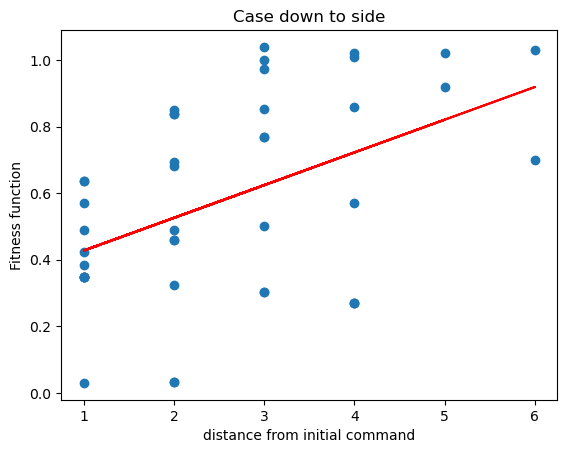

In [26]:
xoveral_bc, yoveral_bc = xbc+xbc2+xbc3, ybc+ybc2+ybc3
xoveral_ch, yoveral_ch = xch+xch3+xch4, ych+ych3+ych4



#create dataframe with with useful data for regression:

df_reg = pd.DataFrame()

df_reg['x'] = xoveral_bc
df_reg['y'] = yoveral_bc

df_reg.head()


res = smf.ols(formula='y ~  x', data=df_reg).fit()

B0, B1 = res.params
plt.scatter(xoveral_bc, yoveral_bc)
plt.plot(df_reg['x'], B0 + B1*df_reg['x'], color = 'r')
plt.title("Case down to side")   
plt.xlabel('distance from initial command')
plt.ylabel('Fitness function')
#plt.hlines(y=0.16, xmin = 0, xmax = 7, color='darkblue', alpha=1)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

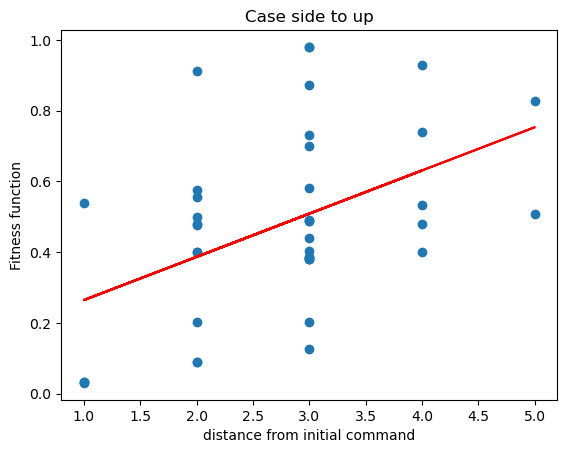

In [27]:
#create dataframe with with useful data for regression:

df_reg = pd.DataFrame()

df_reg['x'] = xoveral_ch
df_reg['y'] = yoveral_ch

df_reg.head()


res = smf.ols(formula='y ~  x', data=df_reg).fit()

B0, B1 = res.params
plt.scatter(xoveral_ch, yoveral_ch)
plt.plot(df_reg['x'], B0 + B1*df_reg['x'], color = 'r')
plt.title("Case side to up")   
plt.xlabel('distance from initial command')
plt.ylabel('Fitness function')
#plt.hlines(y=0.16, xmin = 0, xmax = 7, color='darkblue', alpha=1)

plt.show

In [28]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     10.25
Date:                Thu, 05 Jan 2023   Prob (F-statistic):            0.00276
Time:                        16:06:08   Log-Likelihood:                 2.4183
No. Observations:                  40   AIC:                           -0.8365
Df Residuals:                      38   BIC:                             2.541
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1421      0.111      1.278      0.2

In [29]:
#box plots to show improvement:

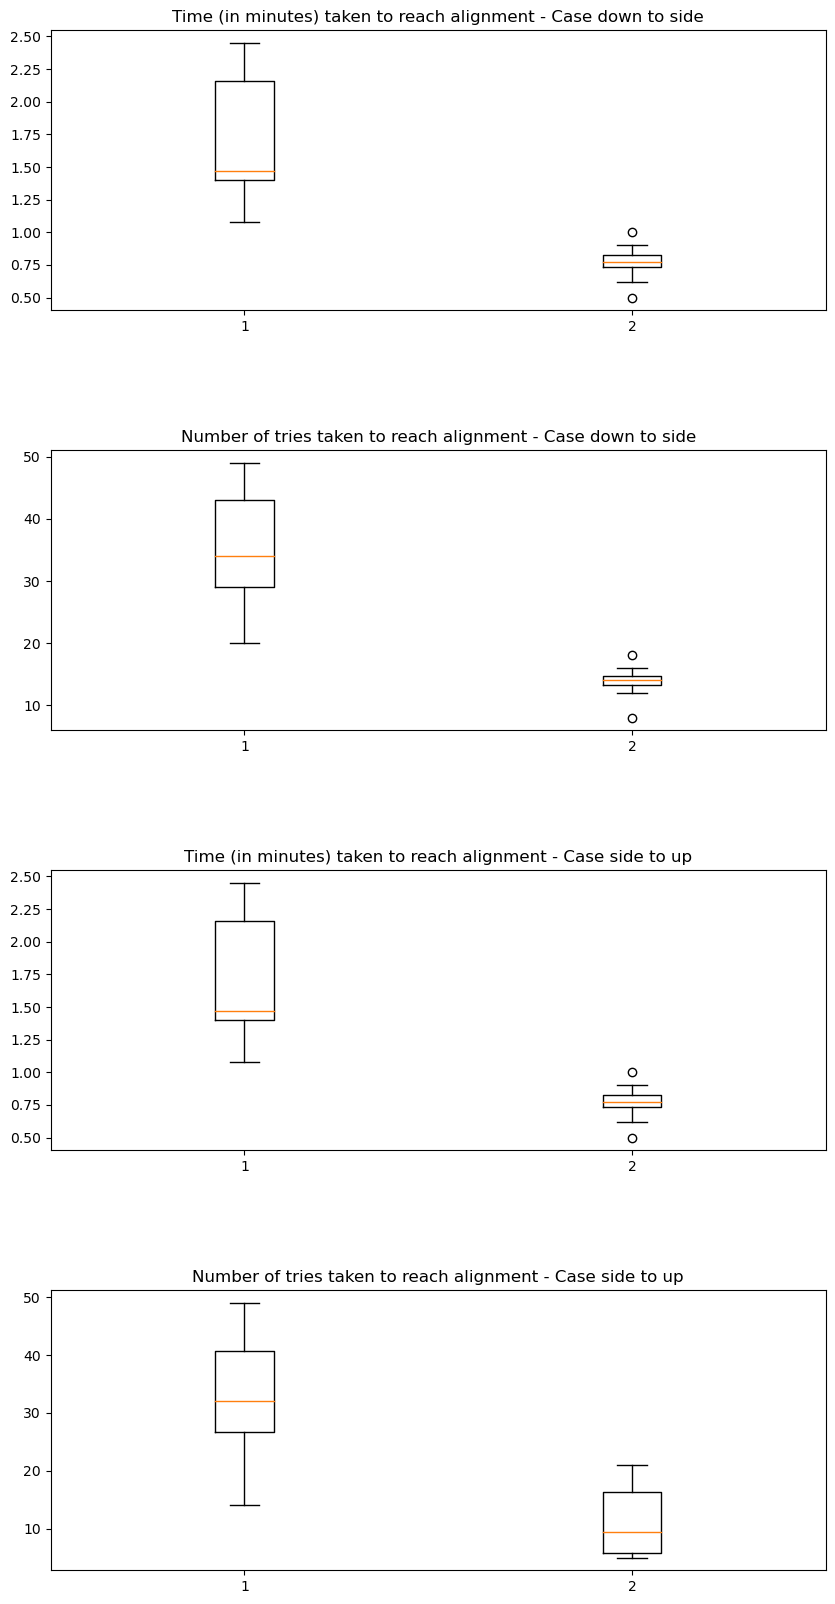

In [34]:
Time_hala_bc = [1.40, 1.28, 1.47, 1.40, 1.16, 1.41, 1.39, 1.52, 2.12, 1.41]
Try_hala_bc = [44, 28, 32,  29, 23, 29, 44 , 34,  32, 40, 31, 20 ]
Time_hala2_bc = [2.09, 2.45, 1.40, 2.24, 2.24, 1.08, 2.11, 2.20, 2.39]
Try_hala2_bc = [38,  49, 23, 44,  43, 20,  40, 43, 47]

Time_hala_ch =[40.45/60, 1.28, 1.47, 1.40, 1.16, 1.41, 1.39, 1.52, 2.12, 1.41]
Try_hala_ch =  [14, 28, 32,  29, 23, 29, 34,  32, 40, 31, 20 ]

Time_hala2_ch =[2.09, 2.45, 1.40, 2.24, 2.24, 1.08, 2.11, 2.20, 2.39]
Try_hala2_ch =  [38,  49, 23, 44,  43, 20,  40, 43, 47]

#data with max nb_com correction:
Time_maxcom_bc = ([50/60, 1, 37/60, 54/60, 47/60, 30/60, 49/60, 44/60, 46/60, 45/60])
Try_maxcom_bc = [15,  18, 12,  16, 14, 8, 14, 14, 14, 13]

Time_maxcom_ch =  [16, 27, 1, 34, 1, 41, 18, 1, 12, 25]
Try_maxcom_ch =  [5, 8, 17 , 11, 21, 14, 5, 20, 5, 8]

data_bc = list([Time_hala2_bc+Time_hala_bc, Time_maxcom_bc])
data_try_bc = list([Try_hala_bc+Try_hala2_bc, Try_maxcom_bc])

data_ch = list([Time_hala2_bc+Time_hala_bc, Time_maxcom_bc])
data_try_ch = list([Try_hala_ch+Try_hala2_ch, Try_maxcom_ch])

# Creating plot
fig, axs = plt.subplots(4, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=.5)


axs[0].boxplot(data_bc)
axs[0].set_title('Time (in minutes) taken to reach alignment - Case down to side')

axs[1].boxplot(data_try_bc)
axs[1].set_title('Number of tries taken to reach alignment - Case down to side')
 
    
axs[2].boxplot(data_ch)
axs[2].set_title('Time (in minutes) taken to reach alignment - Case side to up')

axs[3].boxplot(data_try_ch)
axs[3].set_title('Number of tries taken to reach alignment - Case side to up')
# show plot
plt.show()

In [31]:
# graph representation of a random search (initial solution)

In [32]:
# First networkx library is imported 
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt

class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.savefig('random_search.png')
        plt.show()
        
G = GraphVisualization()

G.addEdge(1, 2)
G.addEdge(1, 3)
G.addEdge(1, 4)


G.addEdge(3, 5)
G.addEdge(3, 6)
G.addEdge(3, 7)

G.addEdge(6, 8)
G.addEdge(6, 9)
G.addEdge(6, 10)

G.addEdge(10, 11)
G.addEdge(10, 12)
G.addEdge(10, 13)

G.addEdge(13, 14)

G.visualize()

ModuleNotFoundError: No module named 'networkx'